# Project : Analysis of Google Search Analytics for piracy terms.

### Document brief: This document is to provide some analysis on the Data Set used in the previous final, and communicate the findings.

##### The code that I have written below is used import the librararies required for analysis. Firstly Pandas, which is the defacto analysis tool for Python.
##### Secondly, seaborn and matplotlibrary, which are plotting tools used in Python (creating charts, diagrams and more).
##### Finally, I have imported the merged dataset from the previous data cleaning done before hand. 

In [252]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv("/home/ollydb20/Data Analysis/Sky Piracy Data/Cleaned Data/cleaned_data.csv")


##### Below is a simple line of code that show the top 5 values of the dataset, this is mainly to ensure that the search terms have been inplemeneted correctly.

In [253]:
df.head(5)

,Unnamed: 0,Month,Searches for 'Free Sky',Searches for 'Free Sky Sports',Searches for 'Sky Sports Free',Searches for 'Watch Sky Sports Free'
0,0,2004-01,30,5,5,0
1,1,2004-02,28,9,9,0
2,2,2004-03,23,0,0,0
3,3,2004-04,25,0,0,0
4,4,2004-05,23,5,5,0


##### I noticed that the table above had two indexes (row indicators) after importing. I have used the line below to drop the duplicate column.

In [254]:
df = df.drop(columns='Unnamed: 0')
df.head(5)

,Month,Searches for 'Free Sky',Searches for 'Free Sky Sports',Searches for 'Sky Sports Free',Searches for 'Watch Sky Sports Free'
0,2004-01,30,5,5,0
1,2004-02,28,9,9,0
2,2004-03,23,0,0,0
3,2004-04,25,0,0,0
4,2004-05,23,5,5,0


##### After reviewing the data, I felt that the most interesting analysis we could run, is to examine the total searches accross all search terms for every month, which could be used to compare months and years, and hypothesise any conclusions. 


##### The code I have created below, creates a new column labelled 'Total_Searches' which has calculated the sum across all search terms for every row in our table. 

In [255]:
df['Total_Searches'] = df.iloc[:, 1:].sum(axis=1)
df.head(5)

,Month,Searches for 'Free Sky',Searches for 'Free Sky Sports',Searches for 'Sky Sports Free',Searches for 'Watch Sky Sports Free',Total_Searches
0,2004-01,30,5,5,0,40
1,2004-02,28,9,9,0,46
2,2004-03,23,0,0,0,23
3,2004-04,25,0,0,0,25
4,2004-05,23,5,5,0,33


##### Now that I have found the Totals for every month, what I believe is one of the most important questions, is to ask which month across our data is the highest, and why? 

##### The code that follows, is used to find the maximum value across all months of our data in an instant.

In [256]:
top_month = df.loc[df['Total_Searches'].idxmax(), 'Month']
print(top_month)

2013-08


##### The result of our code has shown that August 2013 is the highest month for searches related to piracy across our dataset

##### Firstly, My initial thoughts towards why 2013 has the highest total compared to other years are
##### 1. Sky did not have up to date online streaming platforms were in the public domain, and being used by such larger numbers of people as in 2025.
##### 2. It was harder for the average person to access sporting content without a Satellite connection during this time. March 2013 was the first time that Now TV launched Sport within the service, and was  only beginning its growth in popularity.
##### 3. Between 2010-2017 was a significant period of Superfast broadband rollout across the United Kingdom. The UK Government invested £530 million to provide superfast broadband to 90% of areas by 2016.  

##### If we were to compare year on year, my theory would suggest a fast growth between 2004-2017, and a decline afterwards as streaming services (Now TV, Sky GO) and more became available. 

##### Below is a bar chart that compares the total of searches per year, to compare the trend of the searches over time.

/tmp/ipykernel_40452/2796366975.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


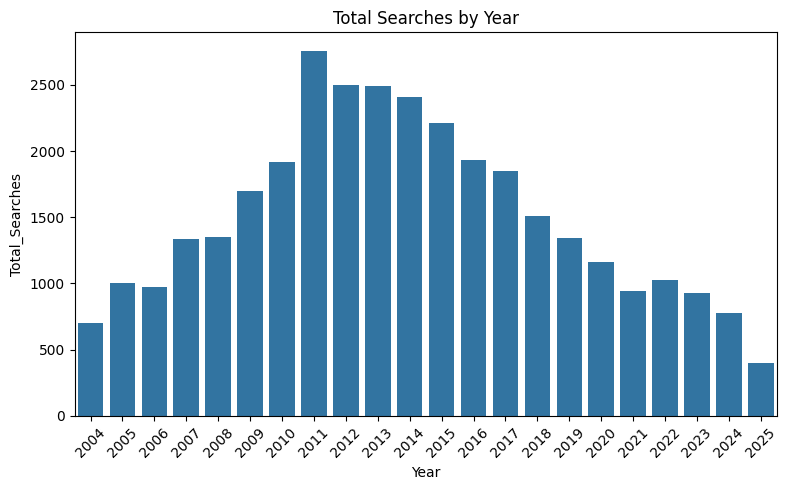

In [257]:
df['Month'] = pd.to_datetime(df['Month']) #Converting the month column into a datetime object 
df['Year'] = df['Month'].dt.year

year_by_data = df.groupby('Year')['Total_Searches'].sum().reset_index() #counts the sum of the total searches by year. 
plt.figure(figsize=(8, 5))  
ax = sb.barplot(x='Year', y='Total_Searches', data=year_by_data) #plotting the bar plot

ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 

plt.title("Total Searches by Year")
plt.tight_layout()  
plt.show()

##### The bar chart shows a sharp increase at a time where online streaming grew in popularity between 2004-2011 (e.g., new UK superfast broadband was being distributed nationally so more people would have access to streaming services), before steadily decreasing afterwards. This suggests that some of my thoughts may be true, but potentially the growth of streaming services occurred faster than I had first anticipated.

##### The next question I want to as is why specifcally August? And is August going to be the most popular month across all of our years? 


##### Similarly, my initial assumptions is that August is likely to be the most common month for searching. My theory is that August is likely to be higher than other months due to the start of the new Football (and other winter sports, including Rugby, NFL etc) league Season, and so the general audience is likely excisted to watch the new seasons, and therefore, use piracy.

##### My hypothesis drawn from my theory is that "August is more likely to have higher searches for pirated streaming on Google than all other months". 

##### The below code is to test this hyptohesis in Python, firstly by creating a new DataFrame that shows the total searches for each month of the year (Each month has the total values for 2004- 2025). This will then return the highest month's value.

In [258]:
df['Month'] = pd.to_datetime(df['Month'])
df['Month_Name'] = df['Month'].dt.month_name()

monthly_average = df.groupby('Month_Name')['Total_Searches'].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_average['Month_Name'] = pd.Categorical(
    monthly_average['Month_Name'],
    categories=month_order,
    ordered=True,
)

monthly_average = monthly_average.sort_values('Total_Searches', ascending=False)

print(monthly_average)

   Month_Name  Total_Searches
1      August            3579
11  September            2998
0       April            2951
4     January            2853
7       March            2762
8         May            2722
3    February            2705
2    December            2625
10    October            2559
9    November            2529
6        June            2504
5        July            2423


##### These findings show consistency with the original hypothesis, as  August is the most popular month for searching of our key terms, followed by September. These months are the first of the football league, and other sports seasons. 


##### Although My findings indicate that my initial judgement is correct, we cannot say for certain that this is simply a correlation of the data AKA a coincidence.

##### To be able to "prove" our hypothesis, or at least be certain that we are not wrong, is by performing a statistical hypothesis test. The aim of a hypothesis test is to prove that the probability that we could be wrong, to be less than 5% (P-Value 0.05). In statistics, a 5% chance chance of being wrong, or 95% chance of being right, is considered acceptable to reject our null hyptothesis. We can then argue that people are statistically more likely to search for piracy streams relating to Sky in August, than any other month.


##### The test I will be using for this analysis, is a simple T-test. A T-test is used to compare the mean average of two different values, as we want to test the mean average of searches for August against the mean average of all other months. The code below deploys the T-test, and will return our P-Value.


In [259]:

from scipy import stats

df['Month'] = pd.to_datetime(df['Month'])
df['Month_Name'] = df['Month'].dt.month_name()

monthly_data = df.groupby('Month_Name')['Total_Searches'].mean()

august_value = monthly_data['August']
other_months = monthly_data.drop('August')

t_stat, p_value = stats.ttest_1samp(other_months, august_value)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

T-statistic: -18.324
P-value: 0.00000


##### Our P-Value (AKA, probability value) is incredibly small, meaning that our findings are statistically signficant. We can reject our null hypothesis and accept that August is more likely to have higher searches for pirated streaming on Google than all other months.



### Caveats/ Considerations.


##### There are some caveats with these findings that we must observe and consider before presenting these findings. 

##### 1. The data pool is limited, and there are many more search terms associated with streaming sports (Not just SKY) that can be included. The search terms were from my own personal understanding of search terms that would be used. However, it may be worth while first finding the most searched terms associated with streaming/piracy from other data sources. 

##### 2. These findings only indicate the trends of searching for piracy content, but does not show the actual rates of viewing piracy content, which may completely differ. We can only conclude that August is more likely to be searched more than other months, but not that August is the month where most piracy streams are watched.  